## Sentiment Analysis of Restaurant Reviews

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading and Understanding the data

In [ ]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# checking for missing value
df.isna().sum()

Review    0
Liked     0
dtype: int64

Data Preprocessing

In [ ]:
# cleaning the reviews
corpus = []
for i in range(0, 1000):
  # Cleaning special character from the reviews
  review = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = df['Review'][i])
  # Converting the entire review into lower case
  review = review.lower()
  # Tokenizing the review by words
  review_words = review.split()
  # Removing the stop words
  review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  # Joining the stemmed words
  review = ' '.join(review)
  # Creating a corpus
  corpus.append(review)

In [ ]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values


In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Naive Bayes model

In [ ]:
# fitting Naive Byes to the training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# predicting the test set
y_pred = mnb.predict(x_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Accuracy score: 0.745
Precision score: 0.7623762376237624
Recall score: 0.7403846153846154


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 24],
       [27, 77]])

Text(70.72222222222221, 0.5, 'Actual values')

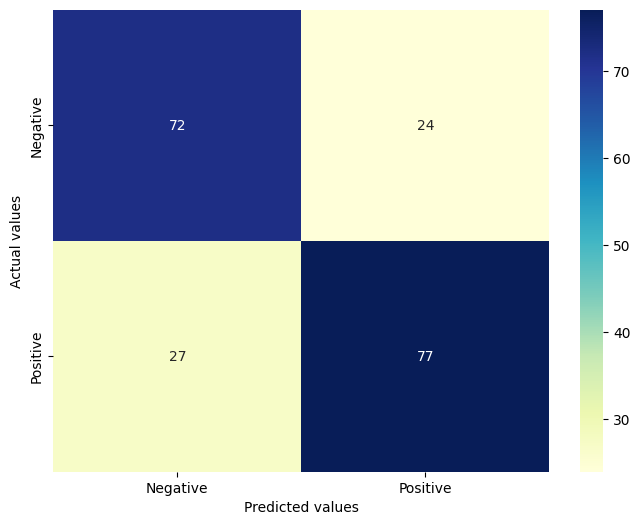

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# Hyperparameter tuning the Naive Bayes model
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 74.0%
Accuracy score for alpha=0.2 is: 74.0%
Accuracy score for alpha=0.3 is: 74.0%
Accuracy score for alpha=0.4 is: 74.5%
Accuracy score for alpha=0.5 is: 74.0%
Accuracy score for alpha=0.6 is: 74.0%
Accuracy score for alpha=0.7 is: 74.0%
Accuracy score for alpha=0.8 is: 74.0%
Accuracy score for alpha=0.9 is: 74.0%
Accuracy score for alpha=1.0 is: 74.5%
--------------------------------------------
The best accuracy is 74.5% with alpha value as 0.4


In [ ]:
mnb = MultinomialNB(alpha=0.4)
mnb.fit(x_train, y_train)

MultinomialNB(alpha=0.4)

Predictions

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return mnb.predict(temp)

In [ ]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [ ]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
